In [47]:
#Loading in the necessary libraries
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(GGally)
library(gridExtra)

ERROR: Error in library(MLmetrics): there is no package called ‘MLmetrics’


In [3]:
#Reading in the "adult.data.txt" file
adult_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", delim=",",col_names=c("age", "workclass", "fnl_wgt","education",
    "education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss",
    "hrs_per_week","native_country","label"))

head(adult_data)

Parsed with column specification:
cols(
  age = col_double(),
  workclass = col_character(),
  fnl_wgt = col_character(),
  education = col_character(),
  education_num = col_character(),
  marital_status = col_character(),
  occupation = col_character(),
  relationship = col_character(),
  race = col_character(),
  sex = col_character(),
  capital_gain = col_character(),
  capital_loss = col_character(),
  hrs_per_week = col_character(),
  native_country = col_character(),
  label = col_character()
)



age,workclass,fnl_wgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,label
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
## Cleaning and Wrangling
adult_tidy <- adult_data %>%
    mutate(label=as_factor(label), capital_gain = as.numeric(capital_gain), 
           capital_loss = as.numeric(capital_loss), hrs_per_week = as.numeric(hrs_per_week) ) %>%
    filter_all(all_vars(. != " ?")) %>%
    select(age,capital_gain,capital_loss,hrs_per_week,label)

head(adult_tidy)

adult_summary <- adult_tidy %>%
    group_by(label) %>%
    summarize(n = n())
adult_summary
## Talk about class imbalance in the recipe

age,capital_gain,capital_loss,hrs_per_week,label
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
39,2174,0,40,<=50K
50,0,0,13,<=50K
38,0,0,40,<=50K
53,0,0,40,<=50K
28,0,0,40,<=50K
37,0,0,40,<=50K


`summarise()` ungrouping output (override with `.groups` argument)



label,n
<fct>,<int>
<=50K,22654
>50K,7508


`summarise()` ungrouping output (override with `.groups` argument)



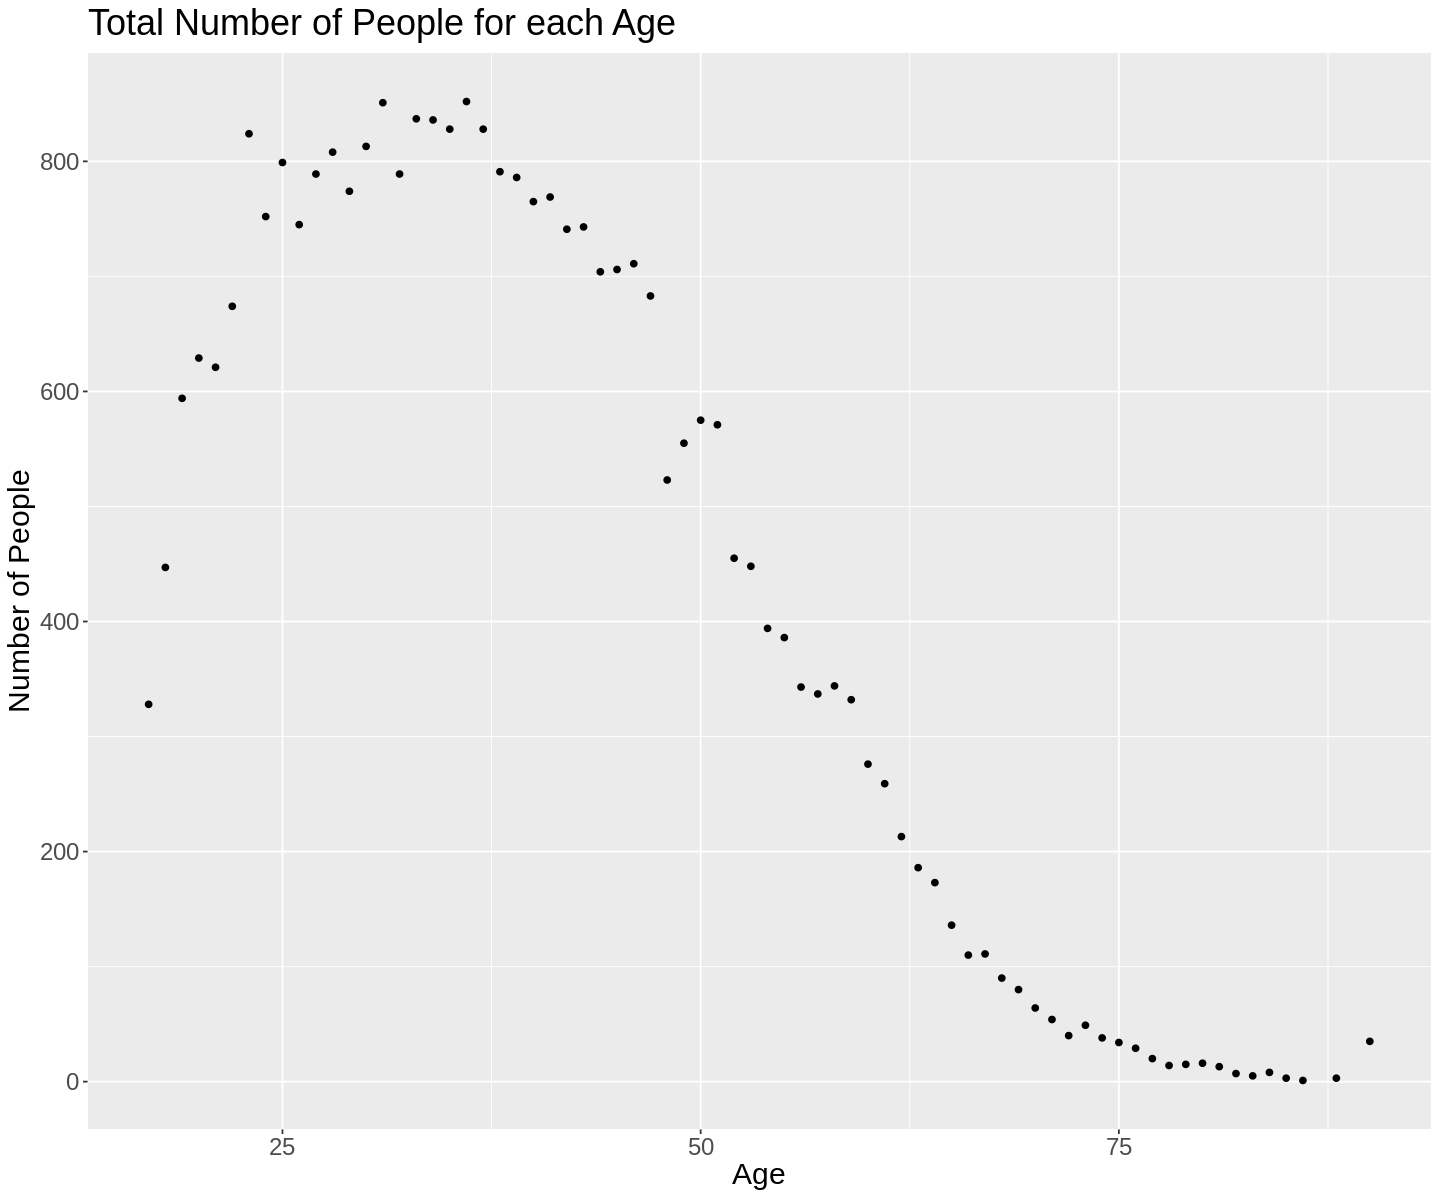

In [5]:
age_distribution <- adult_tidy %>%
    group_by(age) %>%
    summarize(n = n())

options(repr.plot.width = 12, repr.plot.height = 10)
adult_age_distribution <- age_distribution %>%
ggplot(aes(x = age, y = n)) + 
    geom_point() +
    labs(x = "Age", y = "Number of People") +
    ggtitle("Total Number of People for each Age") +
    theme(text = element_text(size = 18))

adult_age_distribution

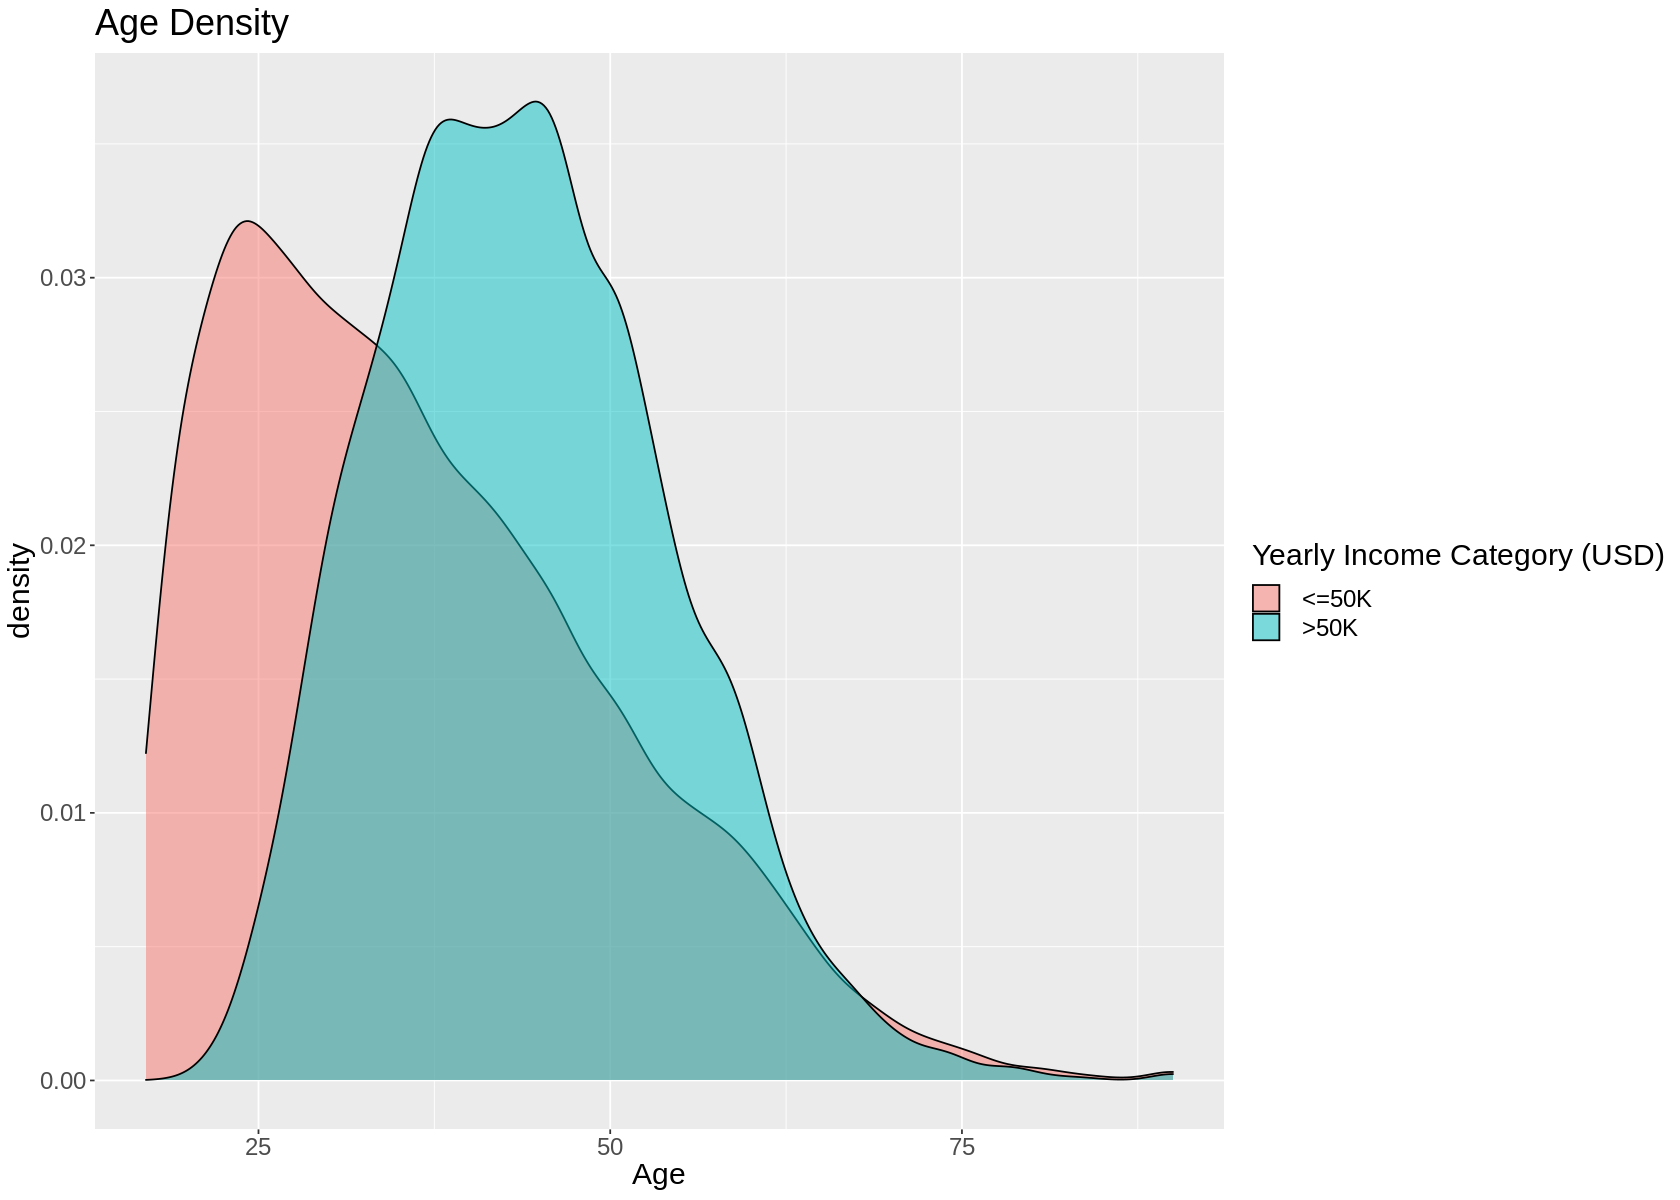

In [6]:
options(repr.plot.width = 14, repr.plot.height = 10)
adult_age_density <- adult_tidy %>%
ggplot(aes(x = age, fill = label)) + 
    geom_density(alpha = 0.5) +
    labs(x = "Age", fill = "Yearly Income Category (USD)") +
    ggtitle("Age Density") +
    theme(text = element_text(size = 18))
adult_age_density

In [7]:
adult_cg_label <- adult_tidy %>%
ggplot(aes(x = label, y = capital_gain)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category (USD)", y = "Capital Gains (USD)") +
    ggtitle("Yearly Income Category versus Capital Gains") +
    theme(text = element_text(size = 22))

In [8]:
adult_capital_gains <- adult_tidy %>%
    filter(capital_gain > 0) %>%
    group_by(label) %>%
    summarize(n = n())

adult_bar_chart <- adult_capital_gains %>%
ggplot(aes(x = label, y = n)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Number of People with Capital Gains") +
    ggtitle("Number of People with Capital Gains in each Yearly Income Category") +
    theme(text = element_text(size = 22))

`summarise()` ungrouping output (override with `.groups` argument)



In [9]:
adult_average_cg <- adult_tidy %>%
    filter(capital_gain > 0) %>%
    group_by(label) %>%
    summarize(average_cg = mean(capital_gain))

`summarise()` ungrouping output (override with `.groups` argument)



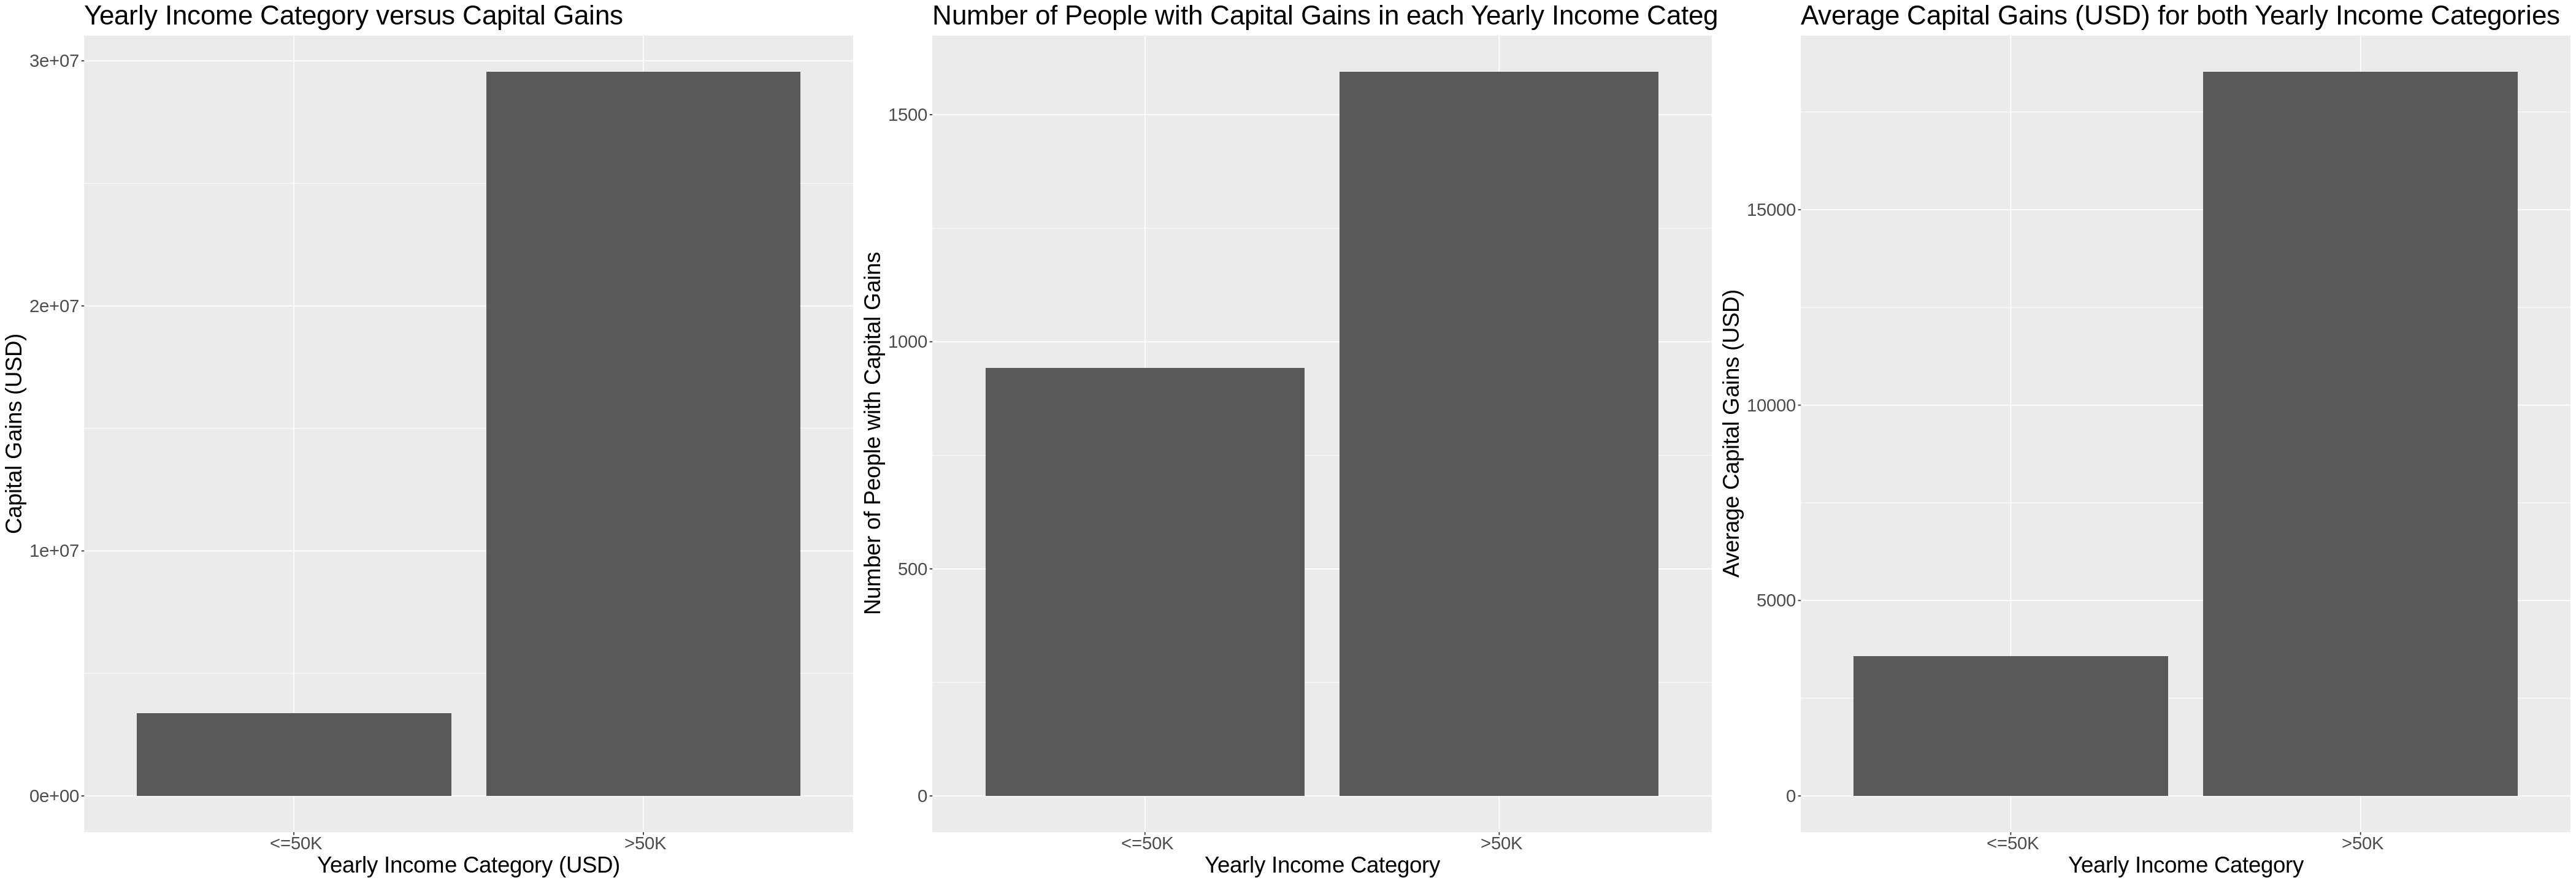

In [10]:
options(repr.plot.width = 35, repr.plot.height = 12)
adult_bar_chart_1 <- adult_average_cg %>%
ggplot(aes(x = label, y = average_cg)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Capital Gains (USD)") +
    ggtitle("Average Capital Gains (USD) for both Yearly Income Categories") +
    theme(text = element_text(size = 22))

grid.arrange(adult_cg_label, adult_bar_chart, adult_bar_chart_1, ncol=3)

In [11]:
adult_cl_label <- adult_tidy %>%
ggplot(aes(x = label, y = capital_loss)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category (USD)", y = "Capital Losses (USD)") +
    ggtitle("Yearly Income Category versus Capital Losses") +
    theme(text = element_text(size = 22))

In [12]:
adult_capital_loss <- adult_tidy %>%
    filter(capital_loss > 0) %>%
    group_by(label) %>%
    summarize(n = n())

adult_cl_bar <- adult_capital_loss %>%
ggplot(aes(x = label, y = n)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Number of People with Capital Losses") +
    ggtitle("Number of People with Capital Losses in each Yearly Income Category") +
    theme(text = element_text(size = 22))

`summarise()` ungrouping output (override with `.groups` argument)



`summarise()` ungrouping output (override with `.groups` argument)



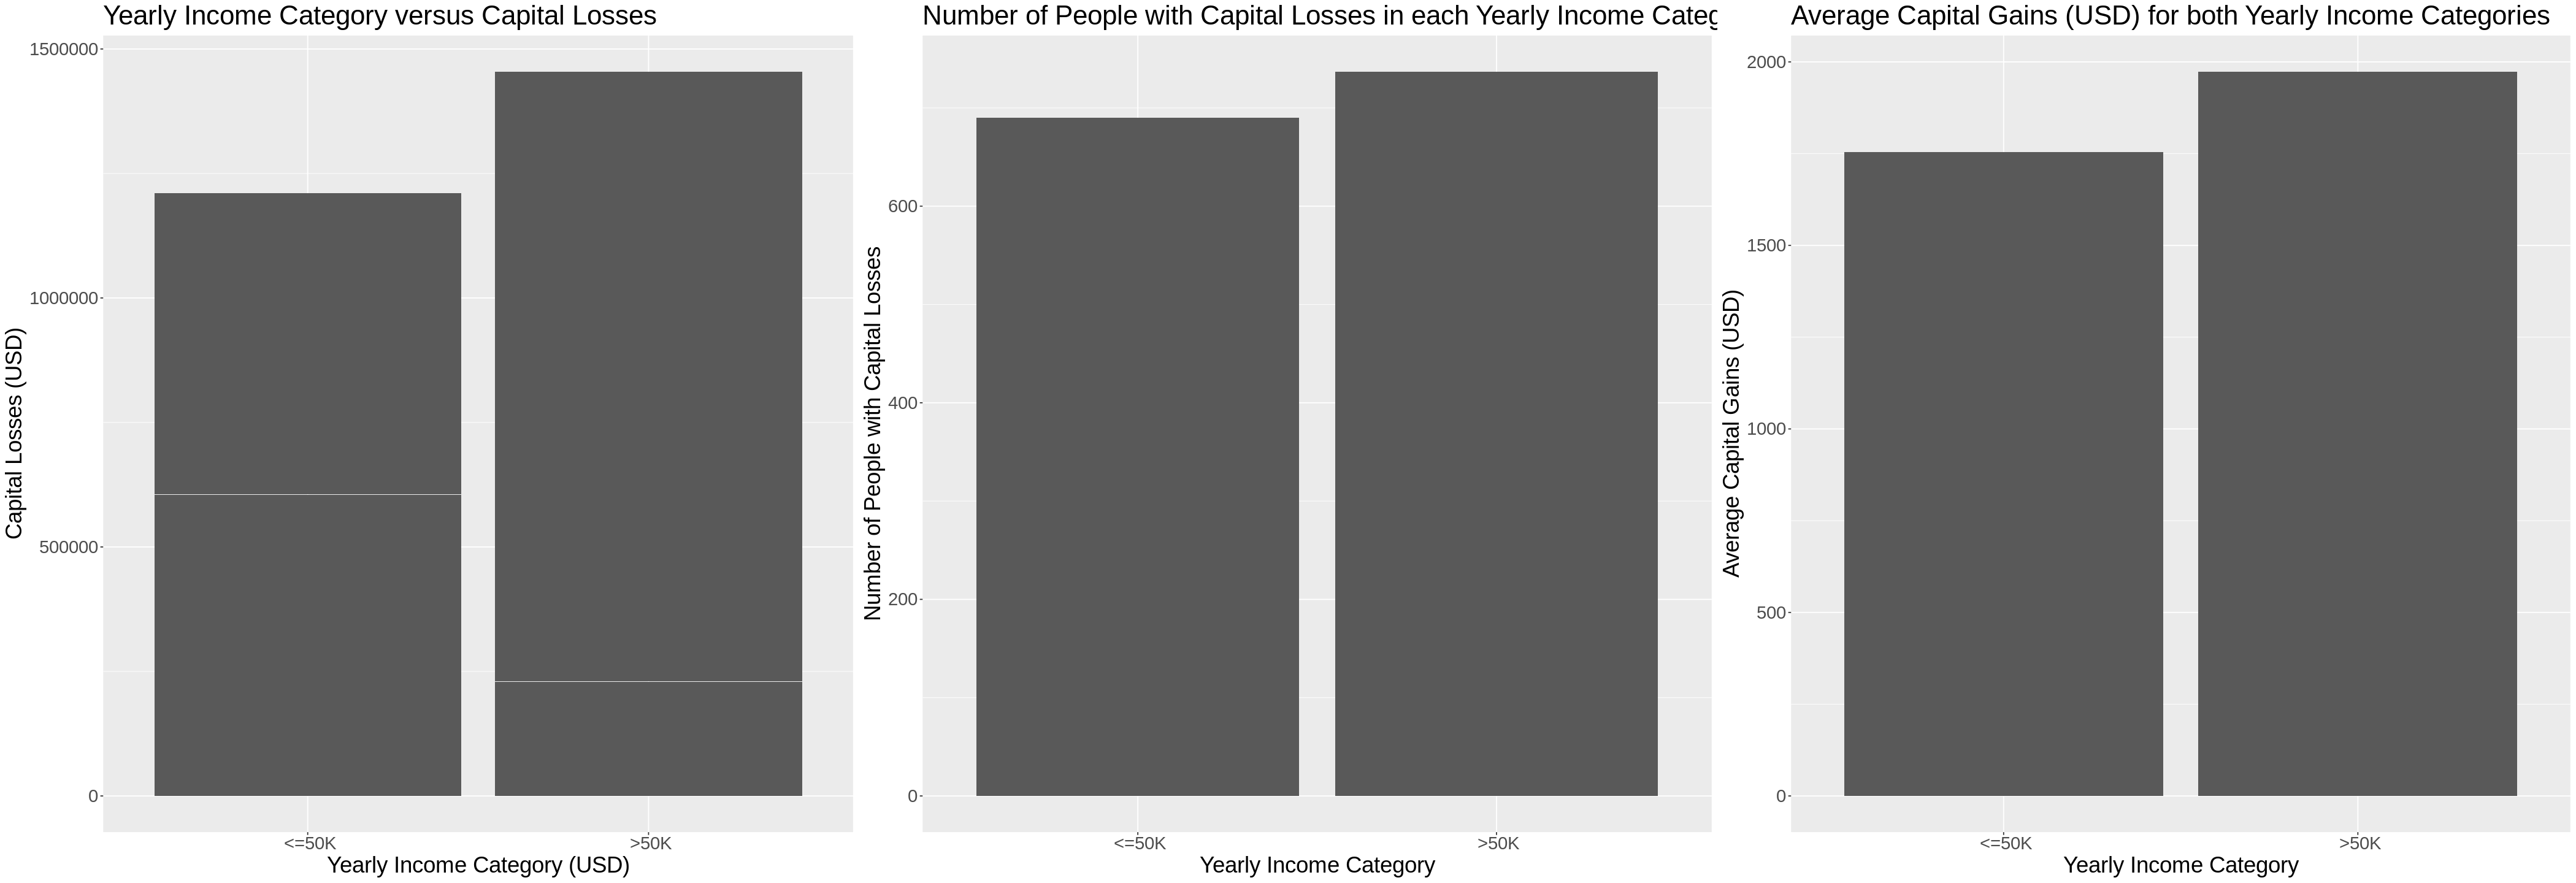

In [13]:
adult_average_cl <- adult_tidy %>%
    filter(capital_loss > 0) %>%
    group_by(label) %>%
    summarize(average_cl = mean(capital_loss))

options(repr.plot.width = 35, repr.plot.height = 12)
adult_cl_bar_1 <- adult_average_cl %>%
ggplot(aes(x = label, y = average_cl)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Capital Gains (USD)") +
    ggtitle("Average Capital Gains (USD) for both Yearly Income Categories") +
    theme(text = element_text(size = 22))

grid.arrange(adult_cl_label, adult_cl_bar, adult_cl_bar_1, ncol=3)

`summarise()` ungrouping output (override with `.groups` argument)



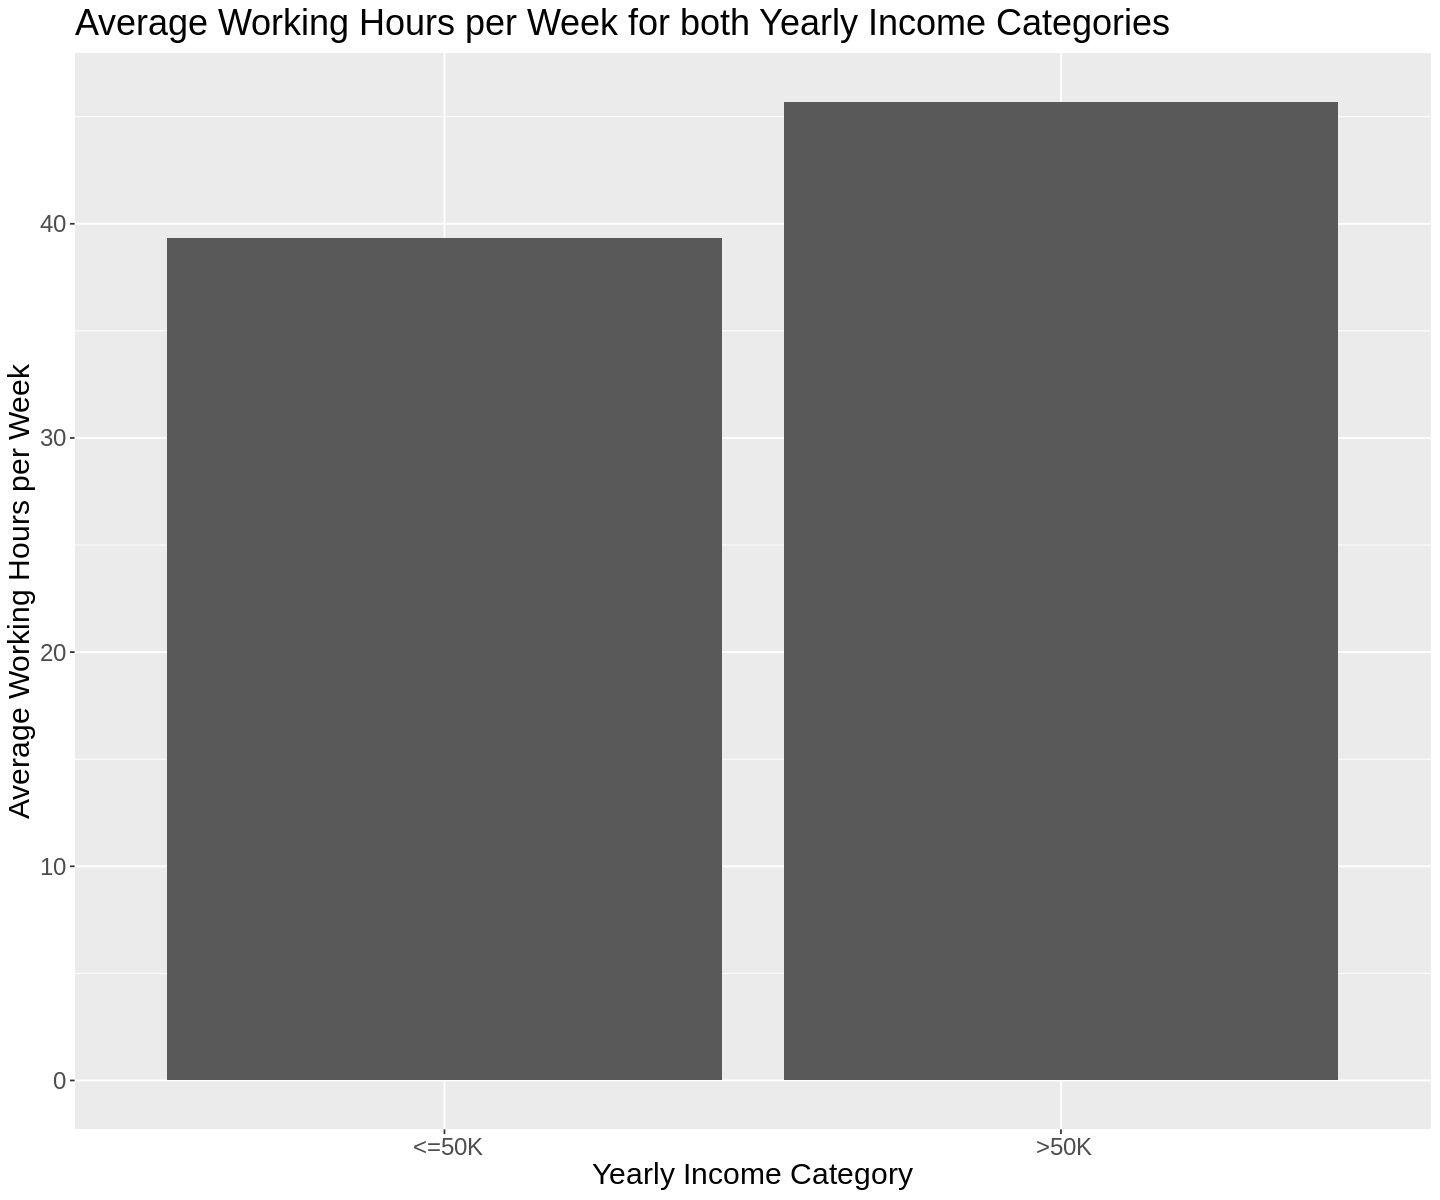

In [14]:
adult_average_wh <- adult_tidy %>%
    group_by(label) %>%
    summarize(average_wh = mean(hrs_per_week))

options(repr.plot.width = 12, repr.plot.height = 10)
adult_cl_bar_1 <- adult_average_wh %>%
ggplot(aes(x = label, y = average_wh)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Working Hours per Week") +
    ggtitle("Average Working Hours per Week for both Yearly Income Categories") +
    theme(text = element_text(size = 18))
adult_cl_bar_1

`summarise()` ungrouping output (override with `.groups` argument)



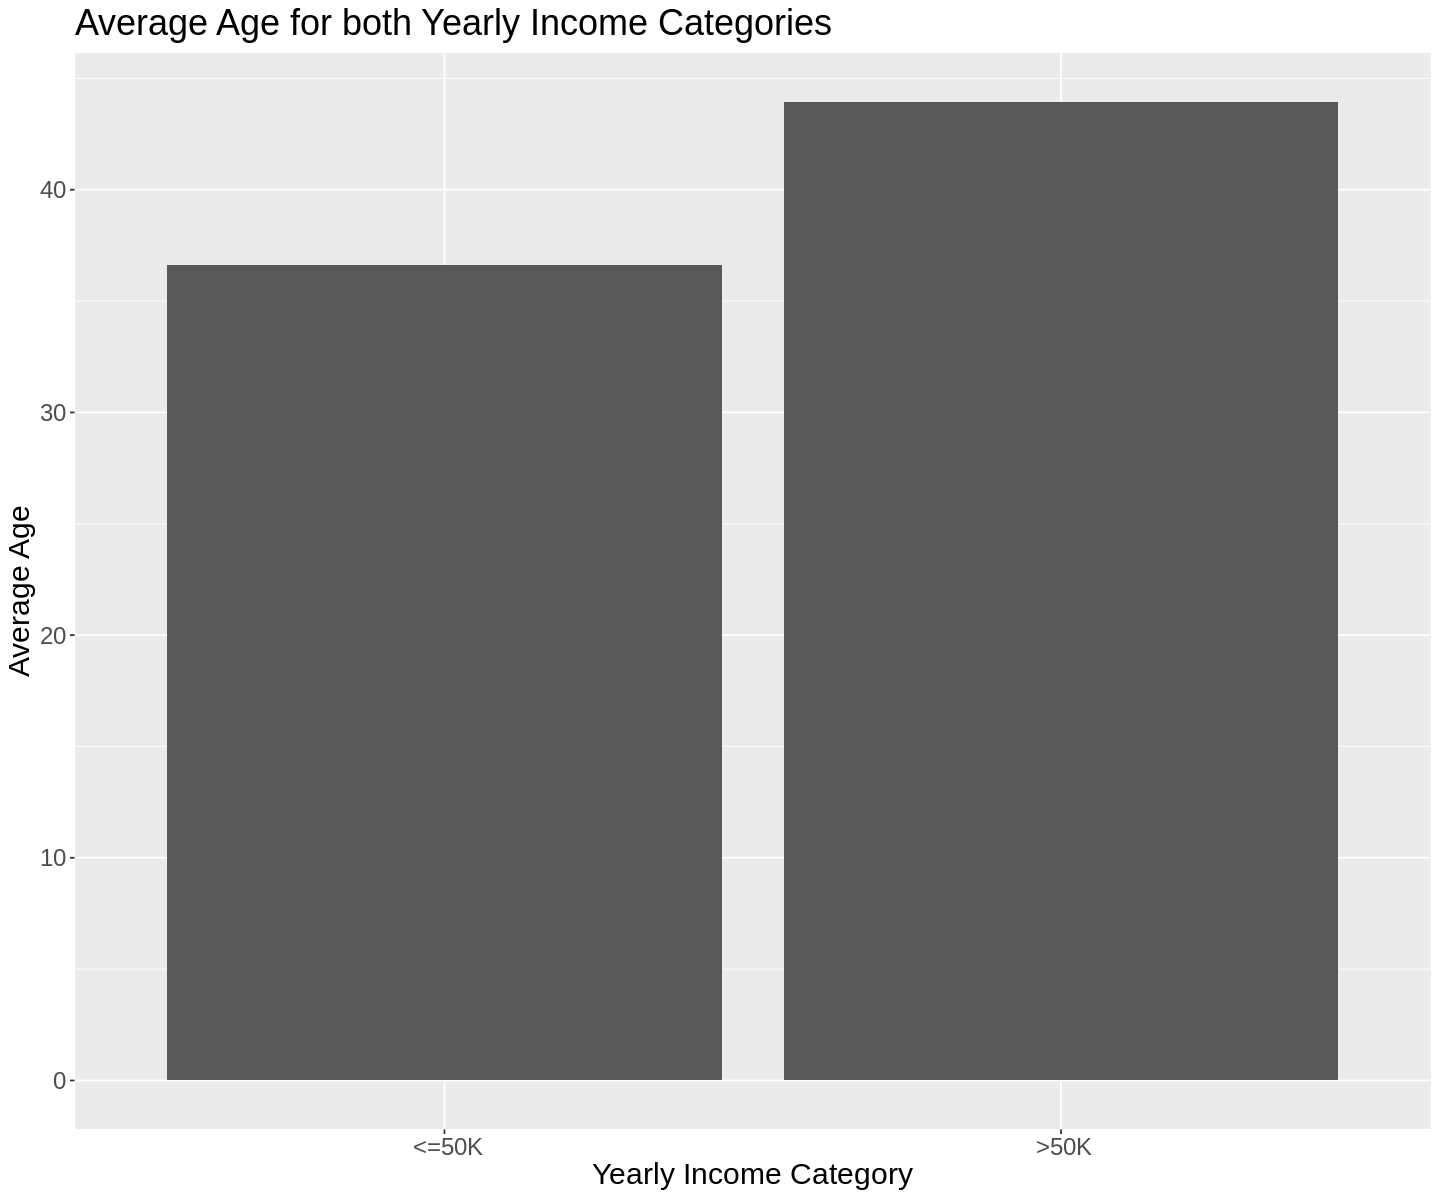

In [15]:
adult_average_age <- adult_tidy %>%
    group_by(label) %>%
    summarize(average_age = mean(age))

options(repr.plot.width = 12, repr.plot.height = 10)
adult_cl_bar_1 <- adult_average_age %>%
ggplot(aes(x = label, y = average_age)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Age") +
    ggtitle("Average Age for both Yearly Income Categories") +
    theme(text = element_text(size = 18))
adult_cl_bar_1

In [16]:
adult_cg_age <- adult_tidy %>%
ggplot(aes(x = age, y = capital_gain)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Age", y = "Capital Gains (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Age versus Capital Gains") +
    theme(text = element_text(size = 22))

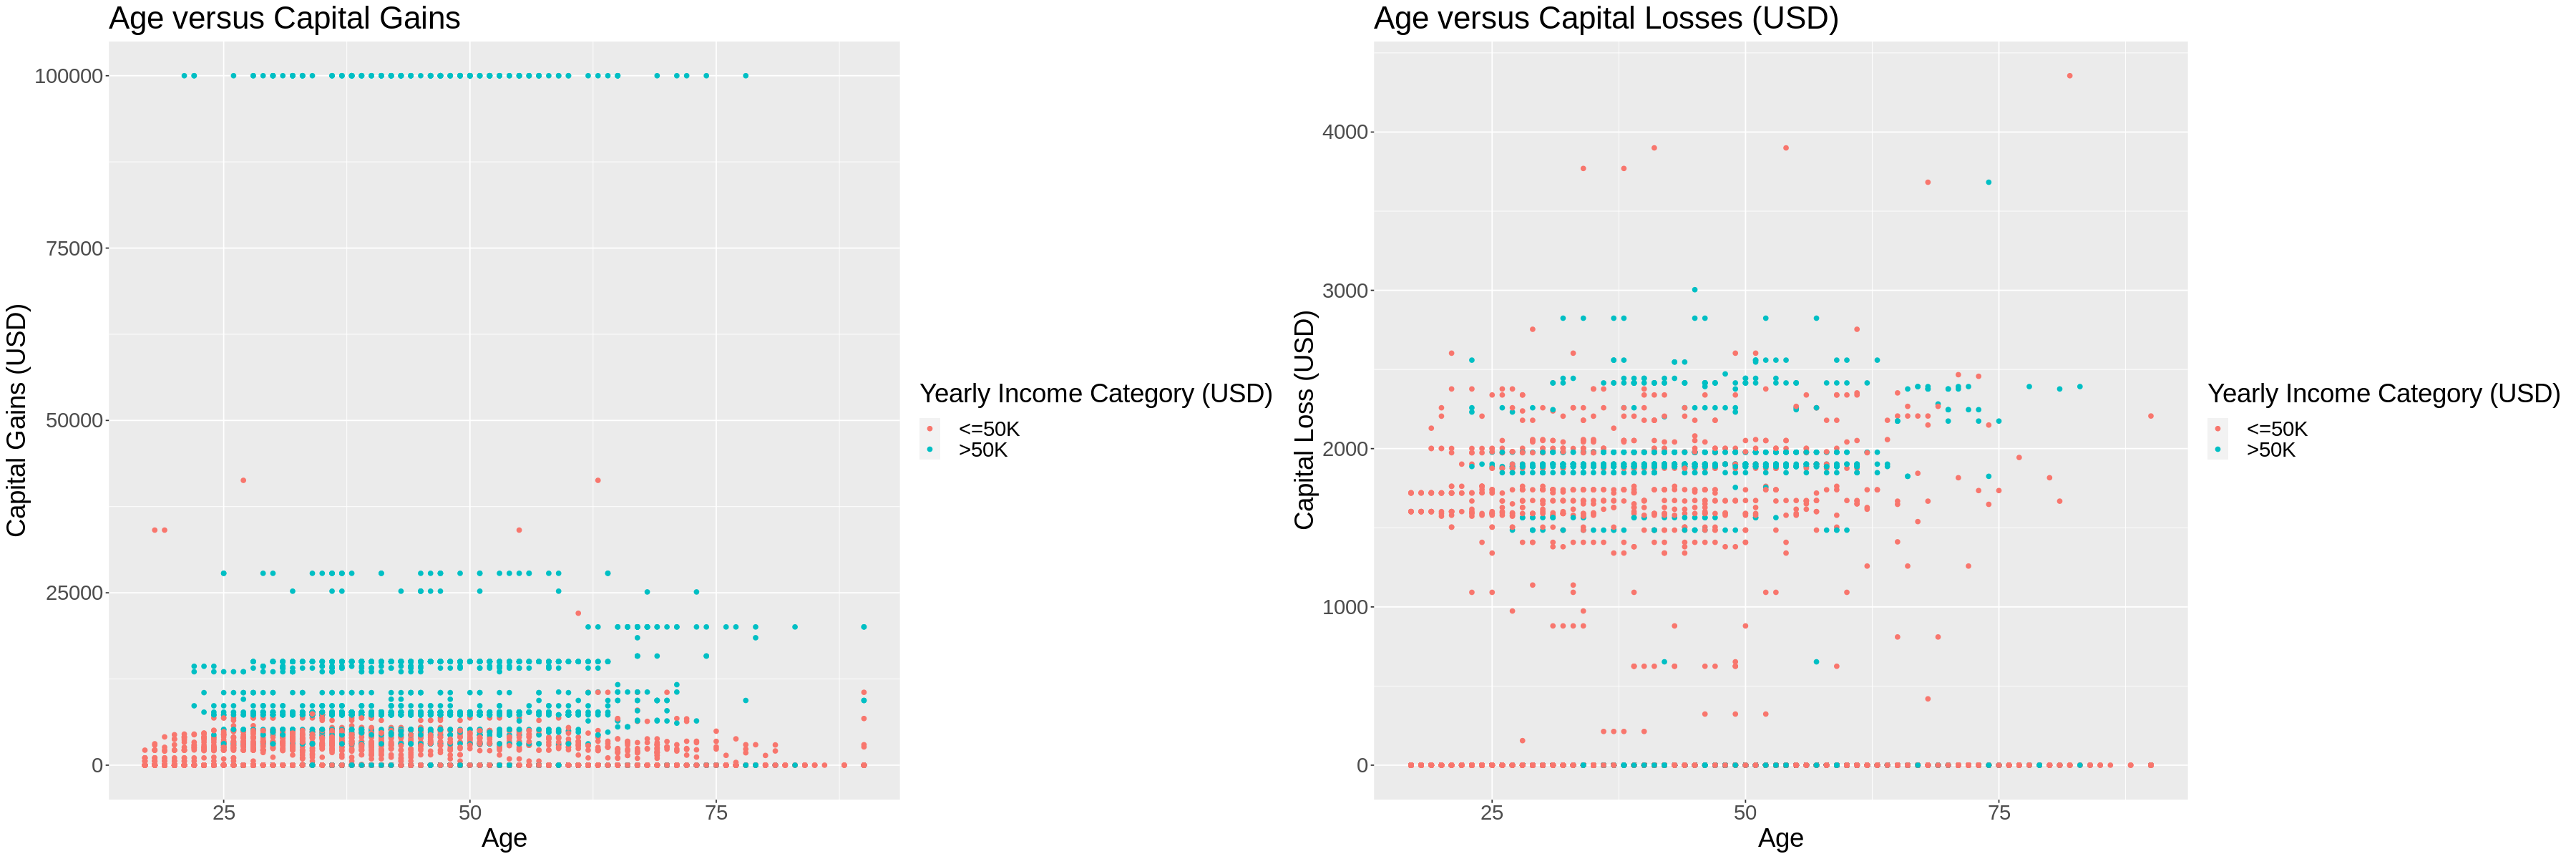

In [17]:
options(repr.plot.width = 30, repr.plot.height = 10)
adult_cl_age <- adult_tidy %>%
ggplot(aes(x = age, y = capital_loss)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Age", y = "Capital Loss (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Age versus Capital Losses (USD)") +
    theme(text = element_text(size = 22))

grid.arrange(adult_cg_age, adult_cl_age, ncol=2)

In [18]:
adult_cg_wh <- adult_tidy %>%
ggplot(aes(x = hrs_per_week, y = capital_gain)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Working Hours per Week", y = "Capital Gains (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Working Hours per Week versus Capital Gains") +
    theme(text = element_text(size = 22))

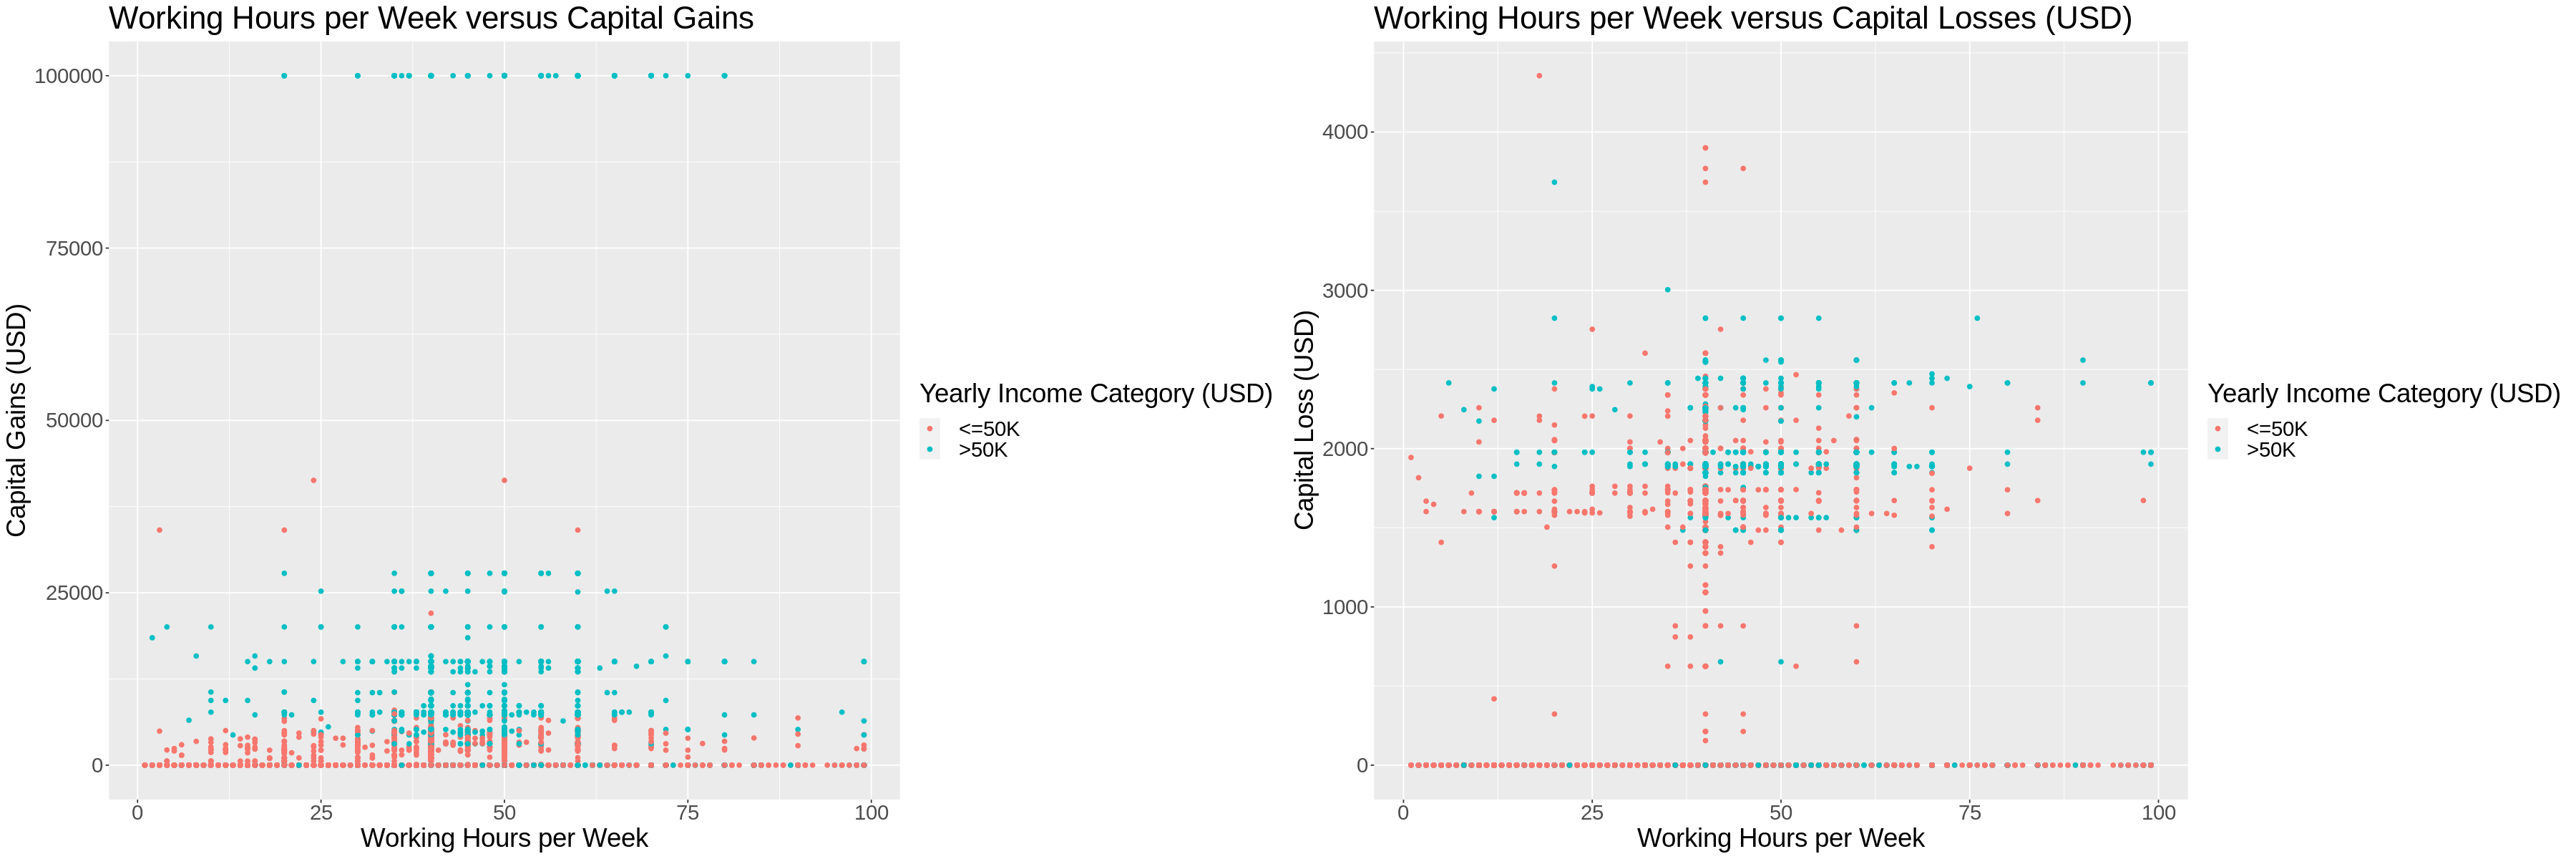

In [19]:
options(repr.plot.width = 30, repr.plot.height = 10)
adult_cl_wh <- adult_tidy %>%
ggplot(aes(x = hrs_per_week, y = capital_loss)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Working Hours per Week", y = "Capital Loss (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Working Hours per Week versus Capital Losses (USD)") +
    theme(text = element_text(size = 22))

grid.arrange(adult_cg_wh, adult_cl_wh, ncol=2)

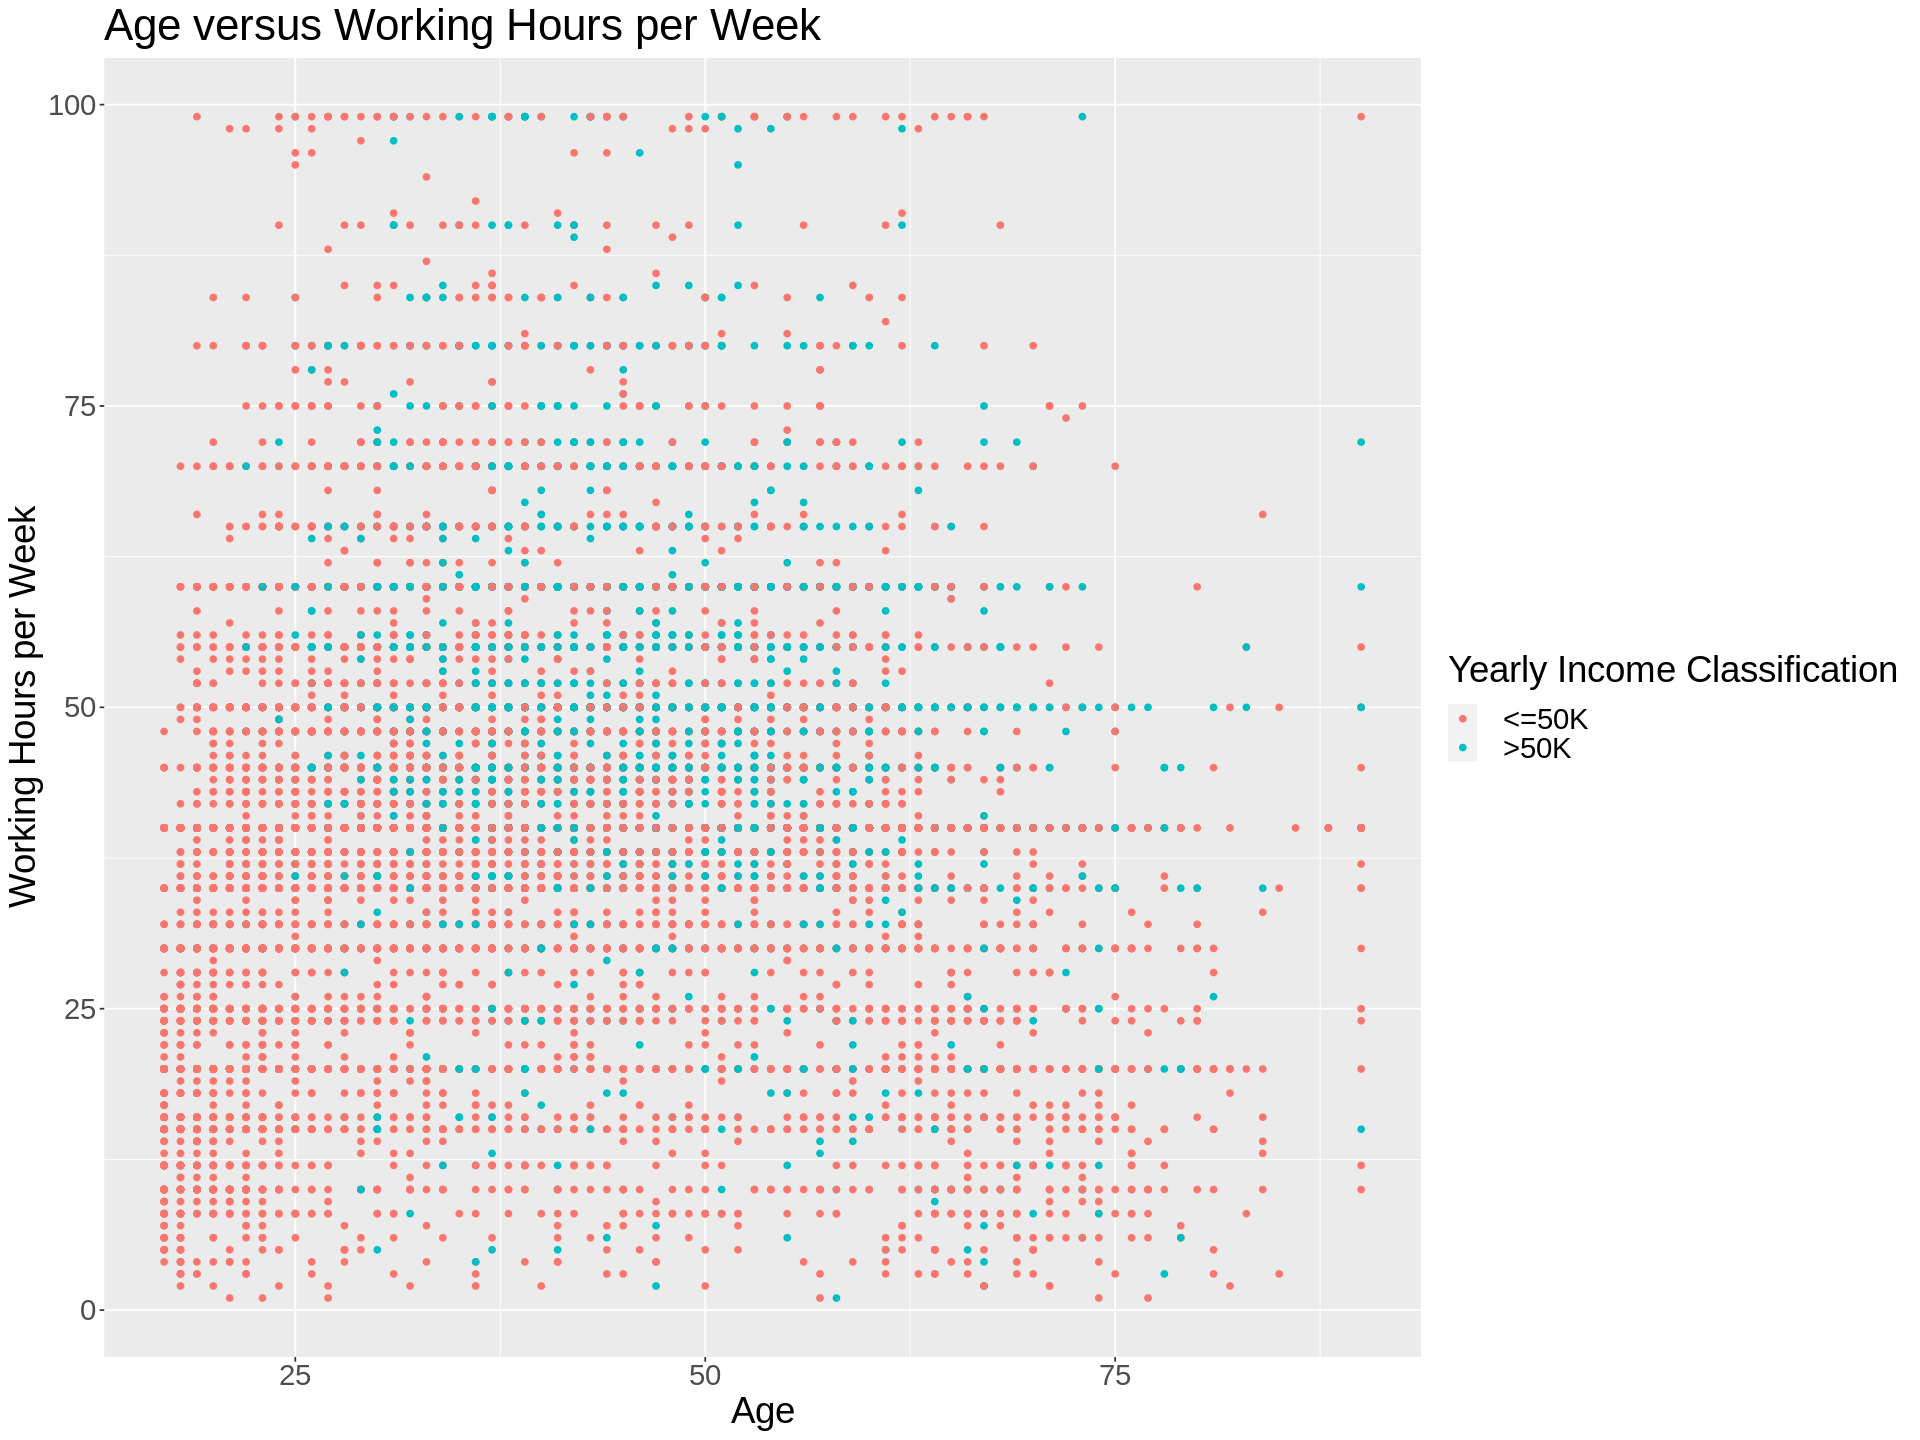

In [20]:
options(repr.plot.width = 16, repr.plot.height = 12)
adult_data_plot <- ggplot(adult_tidy, aes(x = age, y = hrs_per_week, colour = label)) +
    geom_point() +
    labs(x = "Age", y = "Working Hours per Week", colour = "Yearly Income Classification") +
    ggtitle("Age versus Working Hours per Week") +
    theme(text = element_text(size = 22))

adult_data_plot

In [72]:
## Selecting Relavant Data

set.seed(1000)

adult_relevant <- adult_tidy %>%
    select(label, capital_gain)

head(adult_relevant)

label,capital_gain
<fct>,<dbl>
<=50K,2174
<=50K,0
<=50K,0
<=50K,0
<=50K,0
<=50K,0


In [73]:
## Standardizing and Centering 

adult_recipe <- recipe(label~capital_gain,data=adult_relevant) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    step_upsample(label, over_ratio = 1)%>%
    prep()

In [74]:
## Creating a Model

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [75]:
## Cross Validation

adult_vfold <- vfold_cv(adult_relevant, v = 5, strata = label)

In [76]:
## Creating a Workflow

knn_results <- workflow() %>%
    add_recipe(adult_recipe)%>%
    add_model(knn_spec)%>%
    tune_grid(resamples = adult_vfold, grid = 20)%>%
    collect_metrics()

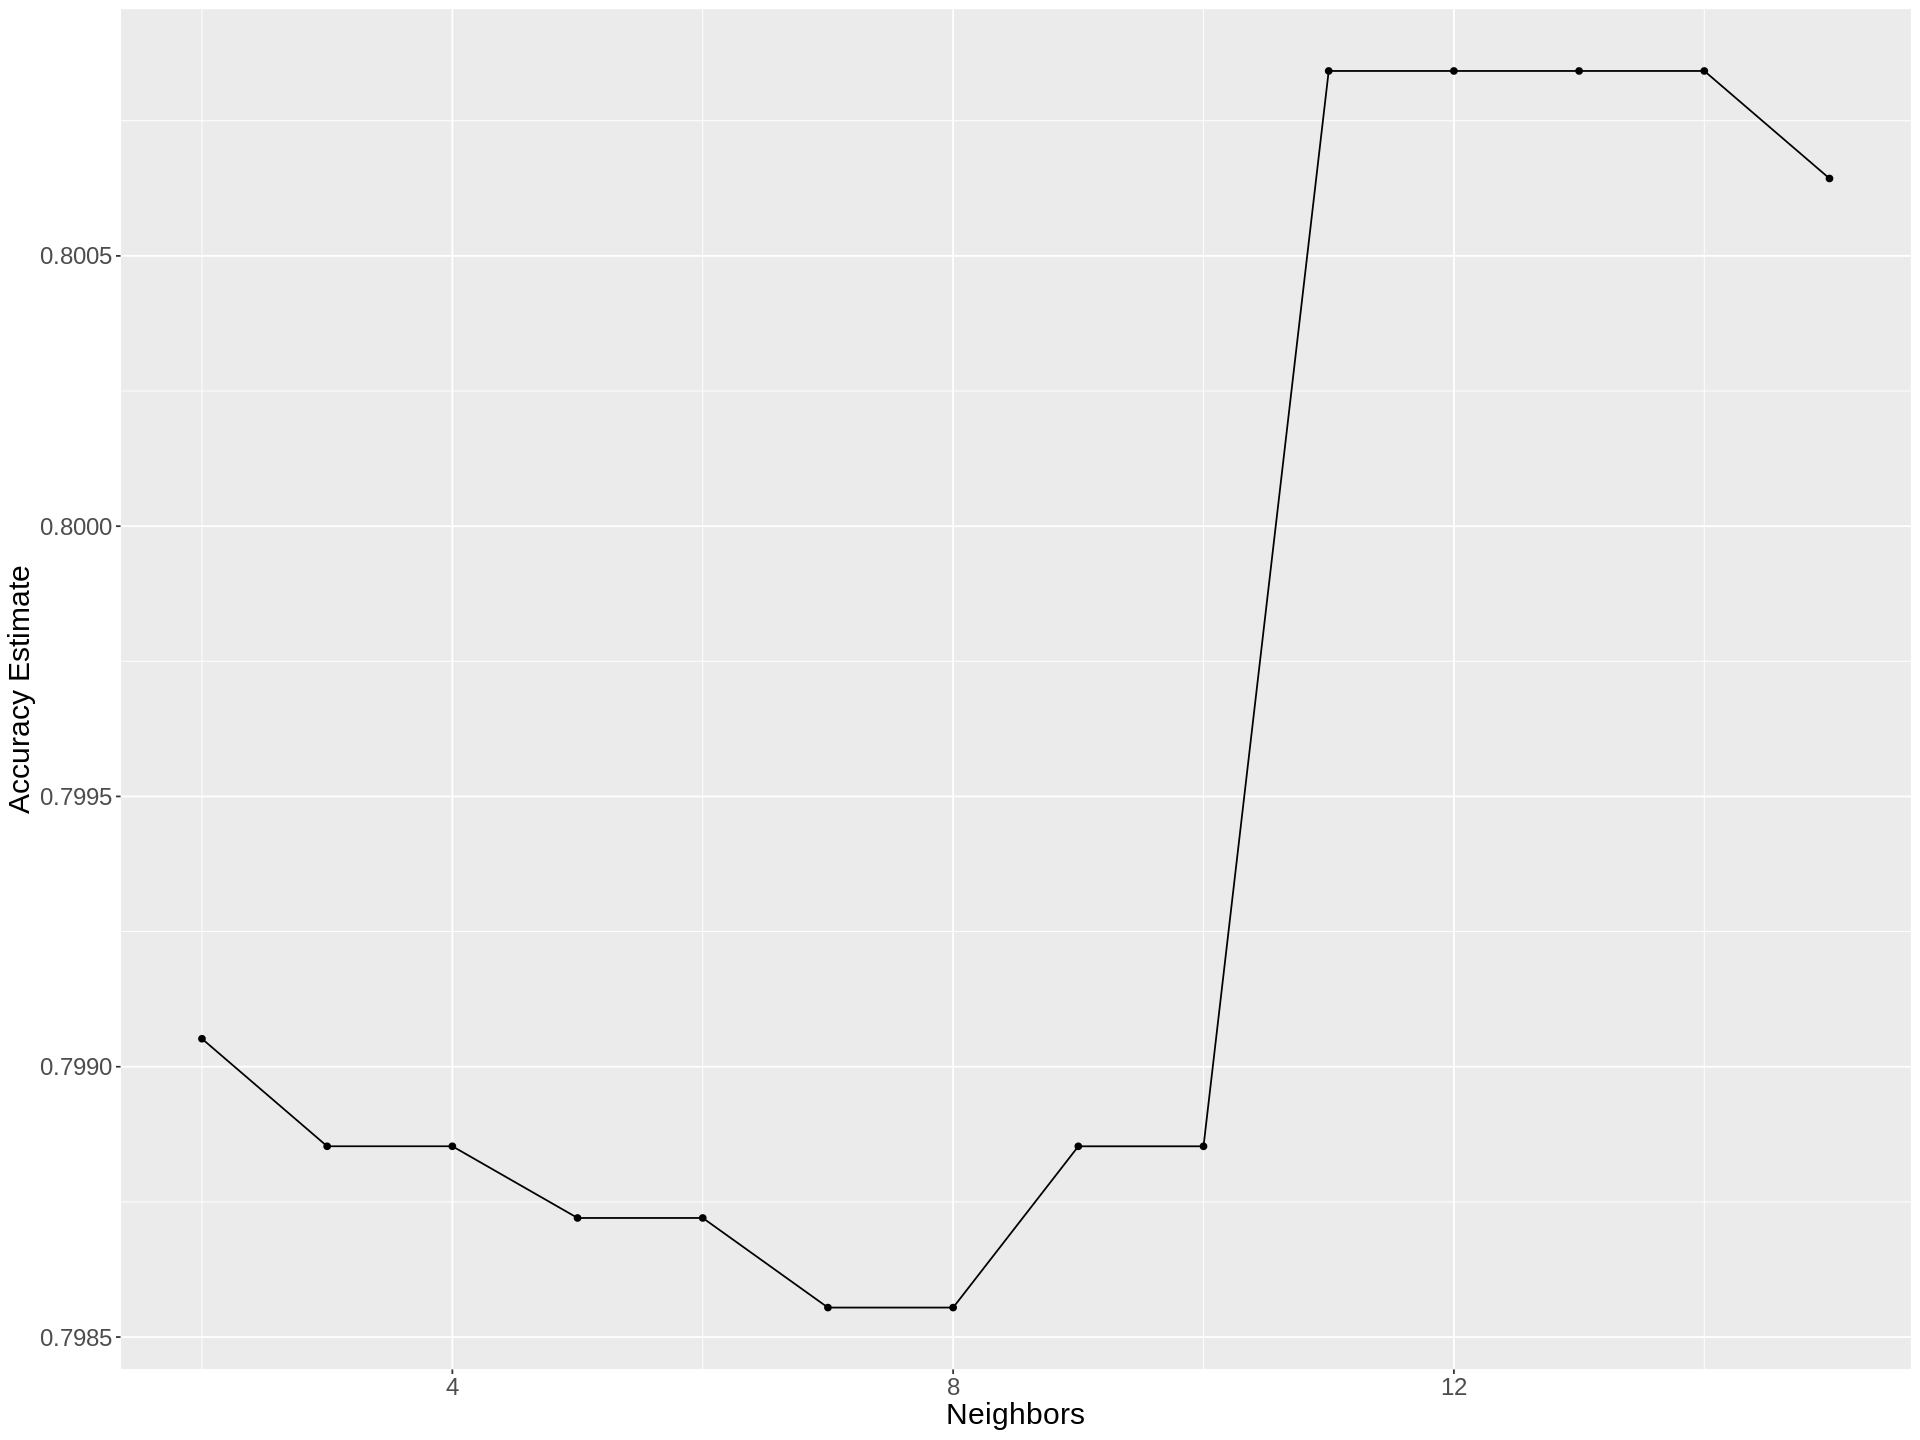

In [77]:
## Scatterplot of Accuracy vs K

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 18))

accuracy_vs_k

In [78]:
adult_testing <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", delim=",",col_names=c("age", "workclass", "fnl_wgt","education",
    "education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss",
    "hrs_per_week","native_country","label"))

head(adult_data)

Parsed with column specification:
cols(
  age = col_character(),
  workclass = col_character(),
  fnl_wgt = col_character(),
  education = col_character(),
  education_num = col_character(),
  marital_status = col_character(),
  occupation = col_character(),
  relationship = col_character(),
  race = col_character(),
  sex = col_character(),
  capital_gain = col_character(),
  capital_loss = col_character(),
  hrs_per_week = col_character(),
  native_country = col_character(),
  label = col_character()
)

Warning message:
“1 parsing failure.
row col   expected    actual                                                                         file
  1  -- 15 columns 1 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
”


age,workclass,fnl_wgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,label
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [80]:
## Cleaning and Wrangling
adult_testing_tidy <- adult_testing %>%
    mutate(label=as_factor(label), capital_gain = as.numeric(capital_gain)) %>%
    filter_all(all_vars(. != " ?")) %>%
    select(capital_gain, label)

head(adult_testing_tidy)

capital_gain,label
<dbl>,<fct>
0,<=50K.
0,<=50K.
0,>50K.
7688,>50K.
0,<=50K.
3103,>50K.


In [81]:
## Creating a Model

knn_spec_2 <- nearest_neighbor(weight_func="rectangular", neighbors=11) %>%
    set_engine("kknn") %>%
    set_mode("classification")

In [82]:
## Creating a Workflow

knn_results_2 <- workflow() %>%
    add_recipe(adult_recipe)%>%
    add_model(knn_spec_2)%>%
    fit(data = adult_testing_tidy)

In [83]:
## Predictions

adult_test_predictions <- predict(knn_results_2, adult_testing_tidy) %>%
       bind_cols(adult_testing_tidy)

head(adult_test_predictions)

.pred_class,capital_gain,label
<fct>,<dbl>,<fct>
<=50K.,0,<=50K.
<=50K.,0,<=50K.
<=50K.,0,>50K.
>50K.,7688,>50K.
<=50K.,0,<=50K.
>50K.,3103,>50K.


In [84]:
##Accuracy

adult_prediction_accuracy <- adult_test_predictions %>%
         metrics(truth = label, estimate = .pred_class)             

adult_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8045817
kap,binary,0.2833133


In [85]:
## Table showing the number of correct and incorrect classifications for each label

accuracy_summary <- adult_test_predictions %>%
    conf_mat(truth = label, estimate = .pred_class)

accuracy_summary

          Truth
Prediction  <=50K.  >50K.
    <=50K.   11339   2922
    >50K.       21    778

In [93]:
## Manually calculating percentage of correct and incorrect classifications for each label

over_correct <- (778/3700)*100
over_incorrect <- (2922/3700)*100
under_correct <- (11339/11360)*100
under_incorrect <- (21/11360)*100

In [108]:
## Manually creating a dataframe

adult_test_predictions$accurate <- ifelse(adult_test_predictions$.pred_class == adult_test_predictions$label, "Yes", "No")

head(adult_test_predictions)

.pred_class,capital_gain,label,accurate
<fct>,<dbl>,<fct>,<chr>
<=50K.,0,<=50K.,Yes
<=50K.,0,<=50K.,Yes
<=50K.,0,>50K.,No
>50K.,7688,>50K.,Yes
<=50K.,0,<=50K.,Yes
>50K.,3103,>50K.,Yes


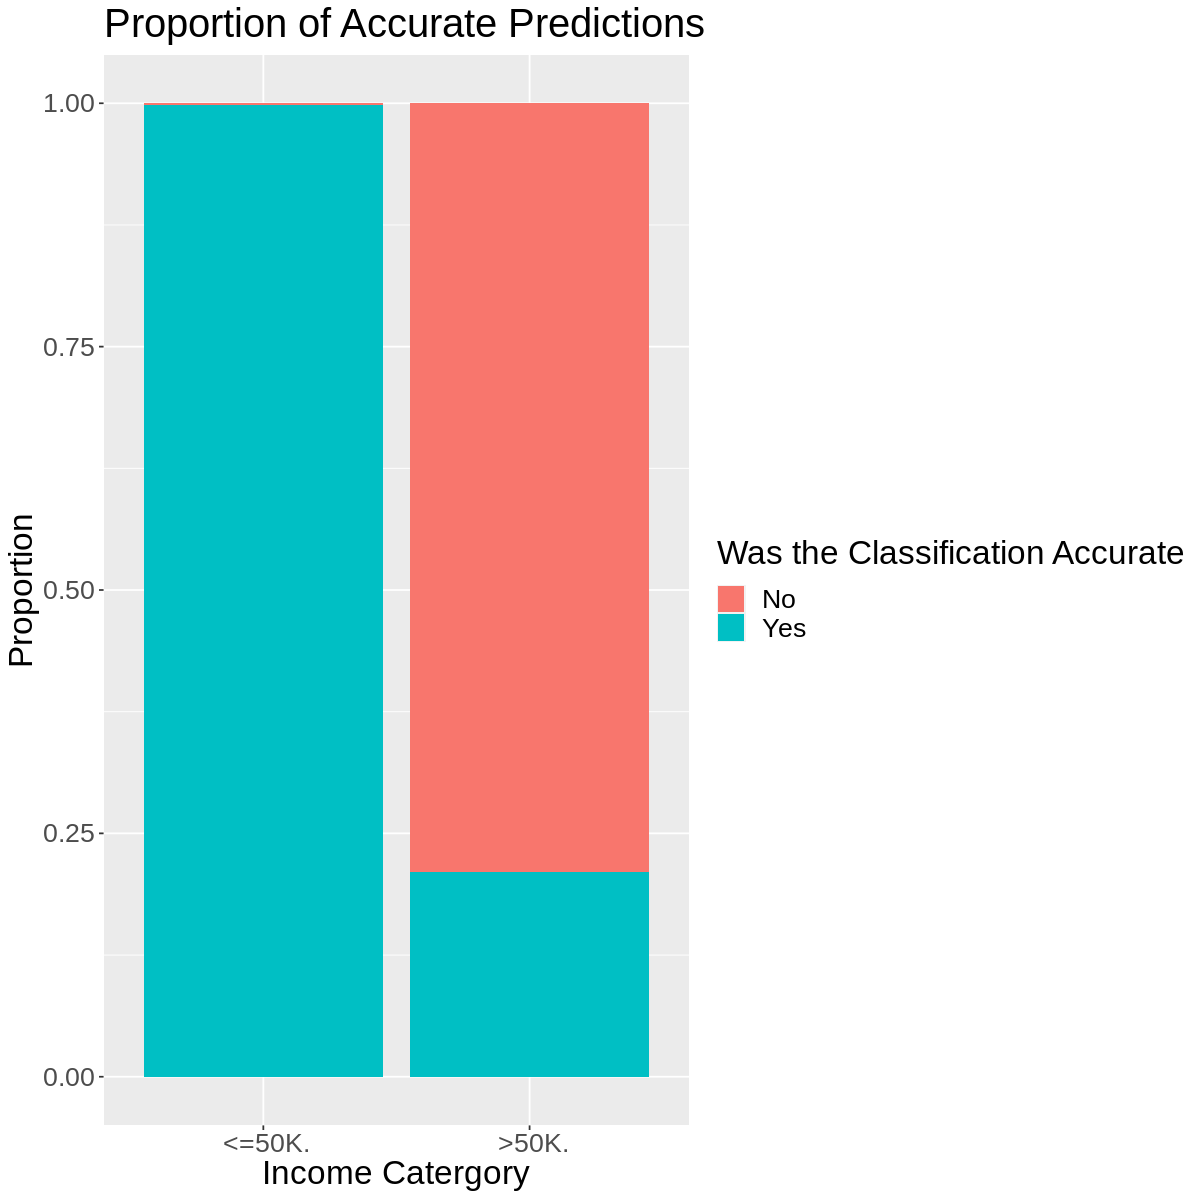

In [109]:
## Plot of the accuracy percentages

options(repr.plot.width = 10, repr.plot.height = 10)
accurate_plot <- adult_test_predictions %>%
    ggplot(aes(x = label, fill = accurate)) + 
    geom_bar(position = 'fill') + 
    xlab("Income Catergory") +
    ylab("Proportion") +
    labs(fill = "Was the Classification Accurate") +
    ggtitle("Proportion of Accurate Predictions") +
    theme(text = element_text(size = 20))

accurate_plot

## Discussion

#### Summarize what you found

We used the nearest neighbours algorithm to classify if a person makes over 50k a year or under 50k a year. We chose use only one predictor to make this classification because it was the only veriable that showed evidence of having a relationship with the variable we are trying to predict. Once we finished our analysis we discovered that using capital gains as a predictor gave us an 80% accurate classifaction algorithm. 

#### discuss whether this is what you expected to find?

#### discuss what impact could such findings have?

#### discuss what future questions could this lead to?